# Transfer learning

Das Ziel des Transferlearning ist es, ein bereits trainiertes Modell auf eine andere Aufgabe zu trainieren. Die Idee dahinter ist den Teil des Netzwerks, der für die Extraktion von Merkmalen zuständig ist, zu "recyceln". Da dies in der Regel der teuerste Teil des Trainings ist, spart man sich dadurch eine Menge an Zeit. Das bedeutet, dass dieser Teil nicht neu trainiert werden muss, sondern die bereits trainierte Featurextraktion genauso gut für eine ähnliche Aufgabe verwendet werden kann. Aus diesem Grund sollte man ein bereits trainiertes Netzwerk nutzen, welches für eine ähnliche Aufgabe trainiert wurde. Lediglich die Klassifikationsschicht wird neu trainiert. Ziel dieses Notebooks ist es, ein Verständnis zu bekommen, was beim Transferlearning passiert.

Schauen Sie sich folgendes Notebook an und versuchen Sie den groben Ablauf zu verstehen.
Sie werden die meisten Befehle die Sie benötigen darin finden.
https://www.tensorflow.org/tutorials/images/transfer_learning

Für diese Aufgabe wollen wir das in der letzten Aufgabe trainierte Convolutional Neural Network, welches auf dem Mnist Datensatz trainiert wurde, auf eine andere Aufgabe trainieren. Die Aufgabe des Netzwerks soll es sein, zu entscheiden, ob eine Zahl größer oder kleiner als eine fixe Zahl ist.

Gehen Sie dazu wie folgt vor:

    * Laden Sie ihr Modell aus der vorherigen Aufgabe mit tf.keras.models.load_model("Name des Modells") Falls Sie ihr Modell nicht gespeichert hatten, können Sie dies mit model.save("Name des Modells"), nachdem Sie erneut trainiert haben, tun.
      
    * Bereiten Sie den Mnist-Datensatz wie in der vorherigen Aufgabe vor, und verändern Sie die Labels so, dass nur zwei Klassen existieren, >= 5 und <= 5
      
    * Laden Sie das zuvor gespeicherte Modell und entfernen Sie die letzte Schicht ( model.pop() )
    
    * Setzen Sie die Layer auf nicht trainierbar
    
    * Fügen Sie eine neue Schicht hinzu
    
    * Trainieren Sie das Netzwerk mit den transformierten Labels
    
    * Plotten Sie wieder die Trainingskurven und erstellen sie eine confusion Matrix

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from sklearn.metrics import confusion_matrix


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# Vorbereiten von Mnist



In [3]:

def relable(labels,threshold=5):
    
    relabled = []
    
    # Hier die transformation der Labels vornehmen
    # Zahl >= Threshold => [0,1] else: [1,0]
    
    return np.array(relabled,dtype=np.float32)

Y_train_relabled = relable(Y_train)
Y_test_relabled = relable(Y_test)
print("original shape    :",Y_train.shape)
print("transformed shape :",Y_train_relabled.shape)


original shape    : (50000, 10)
transformed shape : (50000, 2)


In [4]:
# Laden des Modells Modellnamen anpassen!
base_model = tf.keras.models.load_model("Modelname")

#Hier die letzte Schicht entfernen

base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [5]:

# Hier Modell einfrieren


# Basismodell als Ausgangspunkt nehmen
inputs = tf.keras.Input(shape=(28, 28,1))
x = base_model(inputs, training=False)

# Hier ein Dense-layer hinzufügen sodass zwei Klassen vorhergesagt werden!
last_layer = ......(x)
output     = tf.keras.layers.Activation('softmax')(last_layer)

# Modell Zusammenfügen
model = tf.keras.Model(inputs, output)

In [6]:
learning_rate = 1e-4
# Modell Kompilieren, Kostenfunktion categorical_crossentropy, Optimizer Adam mit der learningrate 1e-4
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 1600)              18816     
_________________________________________________________________
dense (Dense)                (None, 2)                 3202      
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
Total params: 22,018
Trainable params: 3,202
Non-trainable params: 18,816
_________________________________________________________________


In [7]:
loss0, accuracy0 = model.evaluate(x = X_test,y = Y_test_relabled)

313/313 [==============================] - 2s 1ms/step - loss: 1.5537 - accuracy: 0.3287


In [ ]:
epochs = 10
# Hier das Netzwerk trainieren!



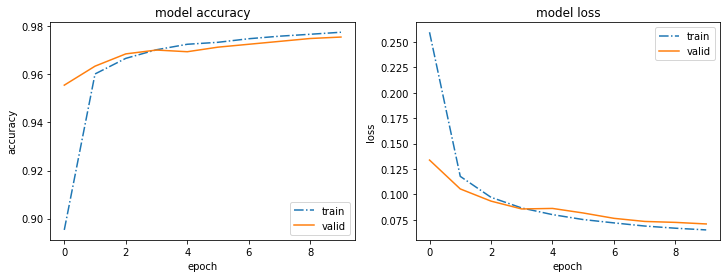

In [10]:

# Plotten Trainingskurve wie in der Aufgabe zuvor


In [20]:
# Confusion Matrix erstellen